In [1]:
# Initial Set-Up

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from time import process_time
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error as MSE
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

##### 1.	What is a neural network? What are the general steps required to build a neural network? 

You start by importing the data to be analyzed.  Then you create the model (typically using Sequential).  Next, you use the .add function to add the hidden layers for the model, specifying how many nodes are in each layer and an activation function as well.  For the output layer, you designate the number of possible outputs, and for a categorization problem, you use the activation function of "softmax."  After creating the model and its layers, you compile the model.  When compiling, you specify and optimizer such as Adam, as well as the loss function and possibly a list of metrics to be used.  After compiling, you fit the model to the data, specifying the features and the targets and adding optional parameter for number of epochs, callback functions, and a validation_split.

##### 2.	Generally, how do you check the performance of a neural network? Why? 

After fitting the model, it's typical to use a validation split rather than cross-validation.  With large datasets, a single score is sufficient.  You can also tune the model by assessing its performance while experimenting with the number of layers and/or the number of nodes in each layer, observing changes in the accuracy scores along the way.  The callback function EarlyStopping in keras can be useful during this process, as it allows you to run a higher number of epochs and stopping when the accuracy score stops improving.  This process will help you to avoid overfitting or underfitting the data, identifying a model that is highly performant.

##### 3.	Create a neural network using keras to predict the outcome of either of these datasets: 
##### Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 
##### Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone


In [2]:
# Import data

col_names=['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings']

abalone_df = pd.read_csv('abalone.data', header = None, names = col_names, delimiter=',')

abalone_df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone_df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
# Use one-hot encoding since the sex column has three categories that are not ordinal

# Encode sex column
one_hot = pd.get_dummies(abalone_df['sex'])
abalone_df = abalone_df.drop(['sex'],axis = 1)
abalone_encoded=abalone_df.join(one_hot)
abalone_encoded.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [5]:
X=abalone_encoded[['shell_weight', 'shucked_weight', 'I']]
y=abalone_df['rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)  

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [11]:
n_cols = X.shape[1] 

t1_start = process_time() 

model_1 = Sequential()
model_1.add(Dense(7000, activation='relu', input_shape = (n_cols,)))
model_1.add(Dense(7000, activation='relu'))    
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mean_squared_error')

model_1.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test))

t1_stop = process_time()

print ('Processing time = ', t1_stop - t1_start)

92/92 [==============================] - 32s 345ms/step - loss: 9.1917 - val_loss: 5.2588
Processing time =  207.953125


##### 4.	Write another algorithm to predict the same result as the previous question using either KNN or logistic regression.

In [7]:
t1_start = process_time() 

model_2=KNR(n_neighbors=3)
model_2.fit(X_train_scaled, y_train)
y_pred = model_2.predict(X_test)
score = MSE(y_pred, y_test)
print('loss: ', score)

t1_stop = process_time()

print ('Processing time = ', t1_stop - t1_start)

loss:  13.019315966684387
Processing time =  0.03125


C:\Users\jmortensen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


##### 5.	Create a neural network using pytorch to predict the same result as question 3. 

In [8]:
#create tensors = matrices 
X_train = torch.FloatTensor(X_train) 
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

print(X_train)

ValueError: could not determine the shape of object type 'DataFrame'

In [ ]:
#artificial neural network
class ANN_Model(nn.Module):
    def __init__(self, input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__() #super is a computed indirect reference. So, it isolates changes
        # and makes sure that children in the layers of multiple inheritence are calling
        #the right parents
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        #apply activation functions
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [ ]:
torch.manual_seed(43)

#create instance of model
ann = ANN_Model()
#loss function
loss_function = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.Adam(ann.parameters(),lr=0.01)
#run model through multiple epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss}')
        
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() 
    optimizer.step() #perform one optimization step each epoch

##### 6.	Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?

### DataCamp

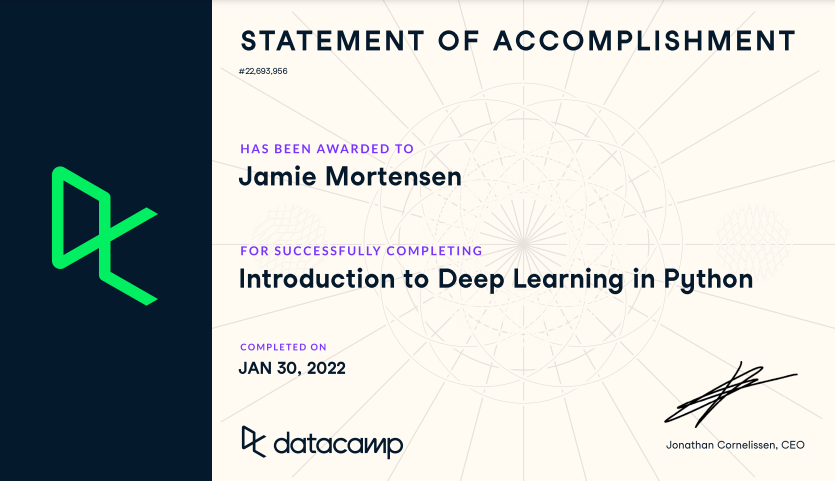